In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [81]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [87]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [90]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [92]:
#for categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [93]:
train["Cabin"] = train["Cabin"].apply(lambda x:x[0] if pd.notna(x) else "na")
train["Cabin"].unique()

array(['na', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [94]:
test["Cabin"] = test["Cabin"].apply(lambda x:x[0] if pd.notna(x) else "na")
test["Cabin"].unique()

array(['na', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [95]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)
train.drop(["PassengerId","Ticket","Name"],axis = 1,inplace = True)
test.drop(["PassengerId","Ticket","Name"],axis = 1,inplace = True)


In [96]:
train["Age"].fillna(train["Age"].mean(skipna = True),inplace=True)
test["Age"].fillna(test["Age"].mean(skipna = True),inplace=True)

train["Embarked"].fillna("S",inplace = True)
test["Embarked"].fillna("S",inplace = True)

test["Fare"].fillna(test["Fare"].mean(skipna = True), inplace = True)


In [97]:
train.isna().sum()

index       0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [98]:
test.isna().sum()


index       0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [99]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [100]:
sex = {'male': 0, 'female': 1}
train["Sex"] = [sex[i] for i in train["Sex"]] 
test["Sex"] = [sex[i] for i in test["Sex"]] 

embarked = {'S': 0, 'C': 1, 'Q':2}
train["Embarked"] = [embarked[i] for i in train["Embarked"]] 
test["Embarked"] = [embarked[i] for i in test["Embarked"]] 

cabin_plot = train[["Cabin", "Survived"]]
train["Cabin"] = LabelEncoder().fit_transform(train["Cabin"])
test["Cabin"] = LabelEncoder().fit_transform(test["Cabin"])

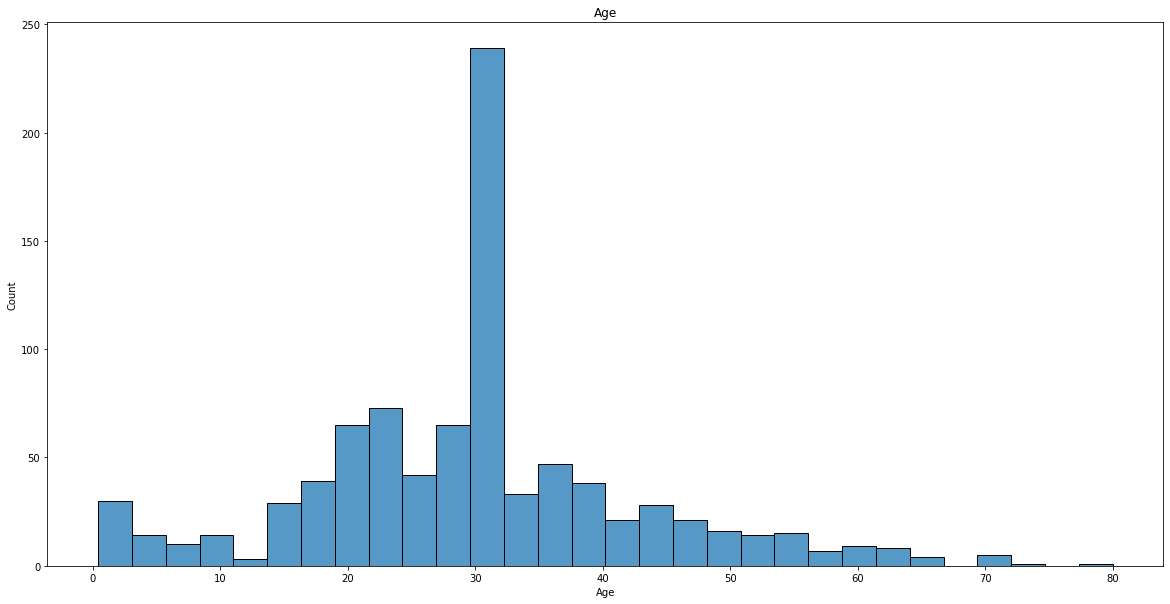

In [101]:
plt.figure(figsize=(20,10))
sns.histplot(x = "Age",data=train)
plt.title("Age")
plt.show()

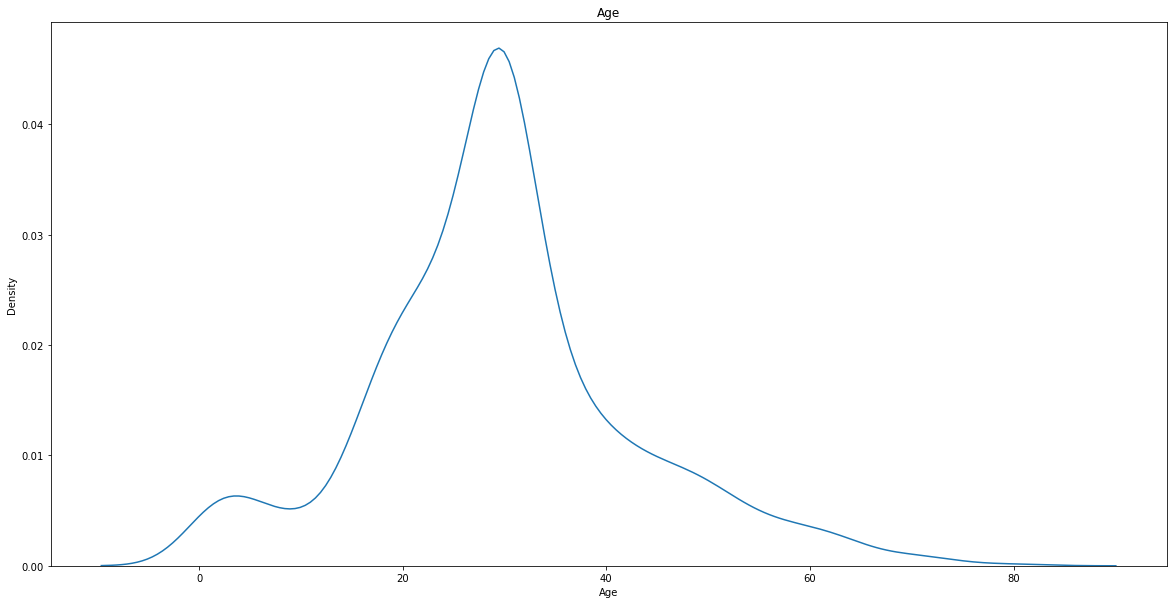

In [102]:
plt.figure(figsize=(20,10))
sns.kdeplot(x = "Age",data=train)
plt.title("Age")
plt.show()

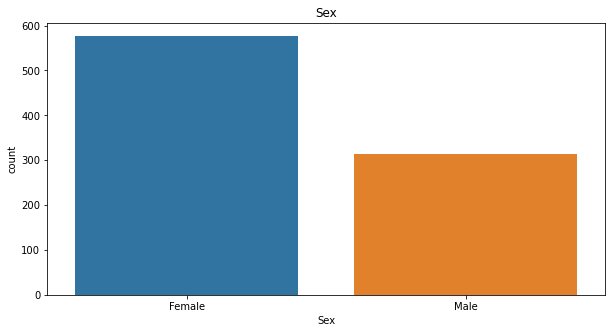

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Sex",data=train)
plt.title("Sex")
plt.xticks([0,1],["Female","Male"])
plt.show()

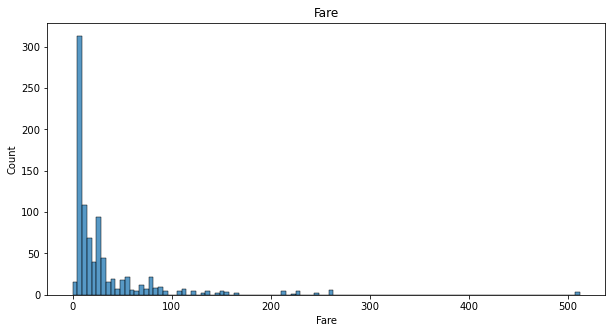

In [104]:
plt.figure(figsize=(10,5))
sns.histplot(x = "Fare",data=train)
plt.title("Fare")
plt.show()

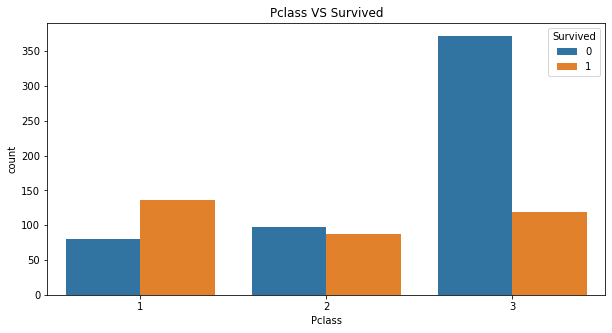

In [105]:
#Relation of various features with Survived
plt.figure(figsize=(10,5))
sns.countplot(x = "Pclass",hue = "Survived", data = train)
plt.title("Pclass VS Survived")
plt.show()

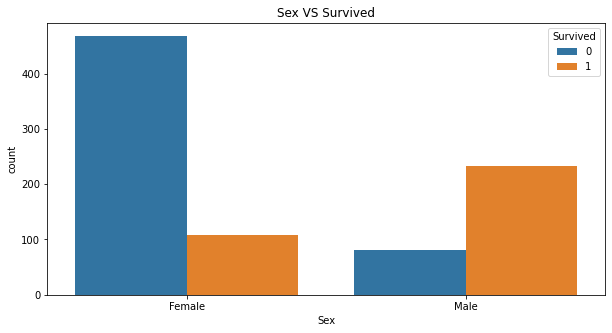

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Sex",hue = "Survived", data = train)
plt.title("Sex VS Survived")
plt.xticks([0,1],["Female","Male"])
plt.show()

In [107]:
y = train["Survived"]
X = train.drop("Survived", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [108]:
dec_tree = DecisionTreeClassifier(random_state=2)
dec_tree.fit(X_train,y_train)
y_pred = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_pred,y_test)*100
print("Decision tree Accuracy:",dec_tree_accuracy)

Decision tree Accuracy: 72.06703910614524


In [112]:
rand_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
rand_forest_model.fit(X_train,y_train)
y_pred = rand_forest_model.predict(X_test)
random_forest_model_acc = accuracy_score(y_pred, y_test) * 100
print("Random Forest Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest Accuracy: 77.6536312849162


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.1s finished


In [113]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
nb_model_acc = accuracy_score(y_pred,y_test)*100
print("Bayes accuracy : ",nb_model_acc)

Bayes accuracy :  73.18435754189943


In [114]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
knn_model_acc = accuracy_score(y_pred,y_test)*100
print("KNN accuracy : ", knn_model_acc)


KNN accuracy :  62.56983240223464


In [116]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred= svm_model.predict(X_test)
svm_model_acc = accuracy_score(y_pred,y_test)*100
print("SVM accuracy : ", svm_model_acc)


SVM accuracy :  63.128491620111724


In [121]:
all_models = pd.DataFrame({"Model" : ["Decision tree classifier", "Random forest classifier", "Naive Bayes classifier", "KNN", "SVM"],
    "Accuracy score" : [dec_tree_accuracy, random_forest_model_acc, nb_model_acc, knn_model_acc, svm_model_acc]})

all_models.sort_values(by="Accuracy score")


,Model,Accuracy score
3,KNN,62.569832
4,SVM,63.128492
0,Decision tree classifier,72.067039
2,Naive Bayes classifier,73.184358
1,Random forest classifier,77.653631
